In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
df=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\PROGRAMS\\dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [59]:
df = df[df['Target'] != 'Enrolled']

In [60]:
df.rename(columns= {"Fathers qualification": "fathers_qualification", "Mothers qualification": "mothers_qualification", "Scholarship holder": "scholarship_holder", "Curricular units 2nd sem (approved)": "curricular_units_2nd_sem_approved", 'Tuition fees up to date': "tuition_fees_up_to_date", "Curricular units 2nd sem (grade)": "get_curricular_units_2nd_sem_grade", "Curricular units 2nd sem (enrolled)": "get_curricular_units_2nd_sem_enrolled", 'Curricular units 1st sem (evaluations)': "get_curricular_units_1st_sem_evaluations", 'Curricular units 1st sem (approved)': "curricular_units_1st_sem_approved", 'Curricular units 1st sem (grade)': 'curricular_units_1st_sem_grade',  'Curricular units 1st sem (enrolled)': 'get_curricular_units_1st_sem_enrolled', 'Curricular units 2nd sem (evaluations)': 'curricular_units_2nd_sem_evaluations'}, inplace=True)

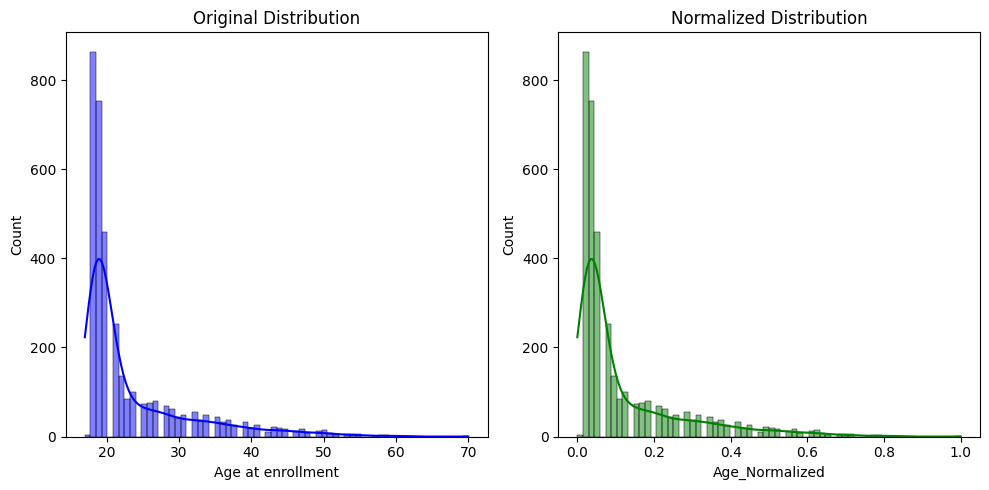

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the 'Age at enrollment' column
# df = ...

# Define a function for Min-Max scaling
def min_max_scaling(data):
    return (data - data.min()) / (data.max() - data.min())

# Normalize 'Age at enrollment' column using Min-Max scaling
df['Age_Normalized'] = min_max_scaling(df['Age at enrollment'])

# Visualize the distribution before and after normalization
plt.figure(figsize=(10, 5))

# Plot original distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age at enrollment'], kde=True, color='blue')
plt.title('Original Distribution')

# Plot normalized distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Age_Normalized'], kde=True, color='green')
plt.title('Normalized Distribution')

plt.tight_layout()
plt.show()

In [62]:
df.drop(columns = ["Age at enrollment"],inplace= True)

In [63]:
from sklearn.model_selection import train_test_split
y = df['Target']
X = df.drop('Target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)

In [64]:
train = X_train
train['Target'] = y_train

test = X_test
test['Target'] = y_test

In [65]:
occ_mapping = {0: "student",
                1: "managerial",
                2: "professional",
                3: "technical",
                4: "professional",
                5: "service",
                6: "agriculture",
                7: "craftsmen",
                8: "factory",
                9: "elementary",
                10: "armed forces",
                90: "unknown",
                99: "unknown",
                101: "armed forces",
                102: "armed forces",
                103: "armed forces",
                112: "managerial",
                114: "managerial",
                121: "professional",
                122: "professional",
                123: "professional",
                124: "professional",
                131: "technical",
                132: "technical",
                134: "technical",
                135: "technical",
                141: "clerical",
                143: "technical",
                144: "clerical",
                151: "service",
                152: "service",
                153: "service",
                154: "service",
                161: "agriculture",
                163: "agriculture",
                171: "craftsmen",
                172: "craftsmen",
                174: "craftsmen",
                175: "craftsmen",
                181: "factory",
                182: "factory",
                183: "factory",
                192: "elementary",
                193: "elementary",
                194: "elementary",
                195: "elementary"}



In [66]:
prev_qual_mapping = {1:'secondary_school',
                    2: 'graduate',
                    3: 'graduate',
                    4: 'masters', 
                    5: 'doctorate',
                    6: 'unknown',
                    9: 'highschool', 
                    10: 'highschool',
                    12: 'unknown', 
                    14: 'highschool', 
                    15: 'pre-highschool', 
                    19: 'highschool', 
                    38: 'pre-highschool', 
                    39: 'graduate', 
                    40: 'graduate', 
                    42: 'masters',
                    43: 'masters'}

In [67]:
qual_mapping = {1: "highschool",
                38:"pre highschool",
                37:"pre highschool",
                19:"highschool",
                11:"pre highschool",
                3:"graduate",
                2:"graduate",
                34:"unknown",
                4:"masters",
                27:"pre highschool", 
                12:"unknown",
                39:"graduate",
                42:"masters",
                5:"masters",
                40:"graduate",
                6:"unknown",
                36:"less than 4",
                44:"masters", 
                41:"graduate", 
                29:"pre highschool", 
                30:"pre highschool",  
                9:"highschool", 
                10:"highschool", 
                35:"less than 4", 
                14:"highschool", 
                43:"masters", 
                26:"pre highschool", 
                25:"pre highschool", 
                18:"graduate", 
                22:"masters", 
                31:"graduate", 
                20:"highschool"}


In [68]:
train["father_qual"] = train["fathers_qualification"].map(qual_mapping)
train["mother_qual"] = train["mothers_qualification"].map(qual_mapping)

In [69]:
train["father_occ"] = train["Fathers occupation"].map(occ_mapping)
train["mother_occ"] = train["Mothers occupation"].map(occ_mapping)

In [70]:
train["previous_qual"] = train["Previous qualification"].map(prev_qual_mapping)
test["previous_qual"] = test["Previous qualification"].map(prev_qual_mapping)

In [71]:
# Print the columns before renaming
print("Columns before renaming:")
print(train.columns)
print(test.columns)

# Rename the column
train.rename(columns={"Daytime/evening attendance": "Attendance_mode"}, inplace=True)
test.rename(columns={"Daytime/evening attendance": "Attendance_mode"}, inplace=True)

# Print the columns after renaming
print("\nColumns after renaming:")
print(train.columns)
print(test.columns)

# Mapping the values
mode_mapping = {0: "Evening", 1: "Daytime"}
train["Attendance_mode"] = train["Attendance_mode"].map(mode_mapping)
test["Attendance_mode"] = test["Attendance_mode"].map(mode_mapping)


Columns before renaming:
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'mothers_qualification', 'fathers_qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'tuition_fees_up_to_date', 'Gender', 'scholarship_holder',
       'International', 'Curricular units 1st sem (credited)',
       'get_curricular_units_1st_sem_enrolled',
       'get_curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'get_curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved',
       'get_curricular_units_2nd_sem_grade',
       'Curricular units 2nd sem (without evaluations)', 'Unemployme

## Father's Qualification Hypothesis

In [72]:
from scipy.stats import chi2_contingency
father_cross_tab = pd.crosstab(train["father_qual"],  train["Target"])

stat, p, dof, expected = chi2_contingency(father_cross_tab)

## interpret p value
alpha = 0.05 # 95% confidence level
if p < alpha:
    print(f"P value is {p}")
    print("Null hypothesis is rejected.")
else:
    print(f"P value is {p}")
    print("Failed to reject the Null hypothesis.")

P value is 0.0003659800526088921
Null hypothesis is rejected.


## Scholarship Holder

In [73]:
from scipy.stats import chi2_contingency
father_cross_tab = pd.crosstab(train["scholarship_holder"],  train["Target"])

stat, p, dof, expected = chi2_contingency(father_cross_tab)

## interpret p value
alpha = 0.05 # 95% confidence level
if p < alpha:
    print(f"P value is {p}")
    print("Null hypothesis is rejected.")
else:
    print(f"P value is {p}")
    print("Failed to reject the Null hypothesis.")

P value is 2.876831146824691e-59
Null hypothesis is rejected.


In [74]:
#import libraries

import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score

from sklearn import set_config

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipeline

In [75]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'mothers_qualification', 'fathers_qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'tuition_fees_up_to_date', 'Gender', 'scholarship_holder',
       'International', 'Curricular units 1st sem (credited)',
       'get_curricular_units_1st_sem_enrolled',
       'get_curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'get_curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved',
       'get_curricular_units_2nd_sem_grade',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflati

In [76]:
features_to_include = ['fathers_qualification', 'mothers_qualification', 'curricular_units_1st_sem_approved', 'curricular_units_2nd_sem_approved', 'get_curricular_units_2nd_sem_grade', 'curricular_units_1st_sem_grade', 'curricular_units_2nd_sem_evaluations', 'tuition_fees_up_to_date', 'get_curricular_units_1st_sem_evaluations', 'Age_Normalized', 'get_curricular_units_1st_sem_enrolled', 'scholarship_holder', 'Debtor', 'get_curricular_units_2nd_sem_enrolled', 'Course', 'Gender','Target']

In [77]:
train_df = train[features_to_include]
test_df = test[features_to_include]

In [78]:
train_df.columns


Index(['fathers_qualification', 'mothers_qualification',
       'curricular_units_1st_sem_approved',
       'curricular_units_2nd_sem_approved',
       'get_curricular_units_2nd_sem_grade', 'curricular_units_1st_sem_grade',
       'curricular_units_2nd_sem_evaluations', 'tuition_fees_up_to_date',
       'get_curricular_units_1st_sem_evaluations', 'Age_Normalized',
       'get_curricular_units_1st_sem_enrolled', 'scholarship_holder', 'Debtor',
       'get_curricular_units_2nd_sem_enrolled', 'Course', 'Gender', 'Target'],
      dtype='object')

In [79]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'mothers_qualification', 'fathers_qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'tuition_fees_up_to_date', 'Gender', 'scholarship_holder',
       'International', 'Curricular units 1st sem (credited)',
       'get_curricular_units_1st_sem_enrolled',
       'get_curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'get_curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved',
       'get_curricular_units_2nd_sem_grade',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflati

In [80]:
y_train = train_df["Target"]
X_train = train_df.drop("Target", axis=1)

y_test = test_df["Target"]
X_test = test_df.drop("Target", axis=1)

In [81]:
cat_features = ['Course', 'scholarship_holder', 'Debtor', 'mothers_qualification','fathers_qualification', 'Gender']
num_features = ['curricular_units_1st_sem_approved', 'curricular_units_2nd_sem_approved', 'get_curricular_units_2nd_sem_grade', 'curricular_units_1st_sem_grade', 'curricular_units_2nd_sem_evaluations', 'tuition_fees_up_to_date', 'get_curricular_units_1st_sem_evaluations', 'get_curricular_units_1st_sem_enrolled', 'get_curricular_units_2nd_sem_enrolled']
ordinal_features = ['Age_Normalized']

In [82]:
X_train

,fathers_qualification,mothers_qualification,curricular_units_1st_sem_approved,curricular_units_2nd_sem_approved,get_curricular_units_2nd_sem_grade,curricular_units_1st_sem_grade,curricular_units_2nd_sem_evaluations,tuition_fees_up_to_date,get_curricular_units_1st_sem_evaluations,Age_Normalized,get_curricular_units_1st_sem_enrolled,scholarship_holder,Debtor,get_curricular_units_2nd_sem_enrolled,Course,Gender
291,27,13,6,6,13.833333,14.333333,7,1,9,0.037736,6,1,1,6,4,0
968,24,19,0,0,0.000000,0.000000,5,0,5,0.603774,5,0,0,5,17,1
785,1,1,6,6,12.142857,10.833333,7,1,10,0.037736,6,0,0,6,10,0
451,27,22,7,7,13.381429,13.381429,8,1,8,0.018868,8,1,0,8,12,0
2890,24,19,8,6,12.500000,13.750000,9,1,13,0.509434,8,0,0,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,1,1,4,5,12.200000,12.250000,5,1,6,0.018868,5,1,0,5,14,1
947,5,3,0,0,0.000000,0.000000,8,0,8,0.094340,4,1,0,4,15,1
1687,3,3,3,0,0.000000,12.666667,5,0,8,0.396226,7,0,1,5,13,1
3988,27,13,5,3,12.000000,14.000000,10,1,13,0.056604,5,1,0,5,6,0


In [83]:
# import pandas as pd

# # Define the column names
# column_names = ['Fathers qualification', 'Mothers qualification', 'Curricular units 1st sem (approved)',
#                 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
#                 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)',
#                 'Tuition fees up to date', 'Curricular units 1st sem (evaluations)',
#                 'Age_Normalized', 'Curricular units 1st sem (enrolled)', 'Scholarship holder',
#                 'Debtor', 'Curricular units 2nd sem (enrolled)', 'Course', 'Gender']

# # Input sample as a DataFrame
# input_sample = pd.DataFrame([[10, 0, 0, 2, 28, 1, 10, 10, 10, 10, 15, 1, 14, 11, 10, 0.075472]], columns=column_names)

# # Make the prediction
# prediction = logistic_clf.predict(input_sample)

# # Print the prediction
# print("Prediction:", prediction)

In [84]:
select_cat_features = ColumnTransformer([('select_cat', 'passthrough', cat_features)])
cat_transformers = Pipeline([('selector', select_cat_features),
                            ('onehot', OneHotEncoder(handle_unknown='ignore')),
                            ])

select_ord_features = ColumnTransformer([('select_cat', 'passthrough', ordinal_features)])
ordinal_transformers = Pipeline([('selector', select_ord_features),
                            ('ordinal_enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
                            ])
                            
select_num_features = ColumnTransformer([('select_num', 'passthrough', num_features)])
num_transformers = Pipeline([('selector', select_num_features),
                            ('scaler', StandardScaler()),
                            ])

preprocess_pipe = FeatureUnion([('cat', cat_transformers),
                                ('ord', ordinal_transformers),
                                ('num', num_transformers),
                                ])
set_config(display="diagram")
preprocess_pipe

FeatureUnion(transformer_list=[('cat',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_cat',
                                                                                  'passthrough',
                                                                                  ['Course',
                                                                                   'scholarship_holder',
                                                                                   'Debtor',
                                                                                   'mothers_qualification',
                                                                                   'fathers_qualification',
                                                                                   'Gender'])])),
                                                ('onehot',
                                                 OneHotEncoder(handle_unknown='ignore'))])),
                               ('ord',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('...
                                                                                  ['curricular_units_1st_sem_approved',
                                                                                   'curricular_units_2nd_sem_approved',
                                                                                   'get_curricular_units_2nd_sem_grade',
                                                                                   'curricular_units_1st_sem_grade',
                                                                                   'curricular_units_2nd_sem_evaluations',
                                                                                   'tuition_fees_up_to_date',
                                                                                   'get_curricular_units_1st_sem_evaluations',
                                                                                   'get_curricular_units_1st_sem_enrolled',
                                                                                   'get_curricular_units_2nd_sem_enrolled'])])),
                                                ('scaler',
                                                 StandardScaler())]))])

## Modelling

In [85]:
class Model:
    def __init__(self, model_name, estimator, preprocessor=None, scoring=None, cv=5, random_state=42):
        self.name = model_name
        self.estimator = estimator
        self.preprocess = preprocessor
        self.scoring = scoring
        self.cv = cv
        self.rs = random_state

    def make_model_pipeline(self):
        self.model = Pipeline([('preprocess', self.preprocess),
                               ('model', self.estimator)])

    def train(self, X_train, y_train):
        '''Trains the model
        Args:
            X_train: Training data feature matrix
            y_train: Training data label vector
            
        Returns:
            trained model
        '''
        self.make_model_pipeline()
        self.cv_results = cross_validate(self.model, X_train, y_train, cv=self.cv, scoring=self.scoring, return_train_score=True)

        mean_train_score = self.cv_results["train_score"].mean()
        mean_val_score = self.cv_results["test_score"].mean()
        
        std_train_score = self.cv_results["train_score"].std()
        std_val_score = self.cv_results["test_score"].std()

        print(f"Cross validated training results for {self.name} model")
        print("---------------------------------------------------------")
        print(f"Train score: {mean_train_score} +/- {std_train_score}" )
        print(f"Validation score: {mean_val_score} +/- {std_val_score}" )
        
        self.fitted_model = self.model.fit(X_train, y_train)

    def evaluate(self, X_test, y_test):
        y_pred = self.fitted_model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average="micro")
        print("F1 score on test set: ", f1)
        print()
        print(classification_report(y_test, y_pred))
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    
    def tune(self, param_grid, X_train, y_train):
        '''Do hyper parameter tuning using GridSearch strategy
        
        Args:
            model: Model to be tuned
            param_grid: dict of parameters
            X_train: Feature matrix
            y_train: Label matrix
            
        Returns: 
            best parameters
            best estimator
        '''
        self.make_model_pipeline()
        search = GridSearchCV(self.model, param_grid=param_grid, cv=self.cv, scoring=self.scoring, return_train_score=True)
        
        search.fit(X_train, y_train)
        
        print("Best parameters: ", search.best_params_)
        
        print("-------------------Best model performance --------------------------")
        
        mean_train_score = search.cv_results_['mean_train_score'][search.best_index_]
        mean_val_score = search.cv_results_['mean_test_score'][search.best_index_]
        std_train_score = search.cv_results_['std_train_score'][search.best_index_]
        std_val_score = search.cv_results_['std_test_score'][search.best_index_]

        print(f"Score of the model on the train set:\n"
              f"{mean_train_score:.3f} +/- {std_train_score:.6f}")

        print(f"Score of the model on the validation set:\n"
              f"{mean_val_score:.3f} +/- {std_val_score:.6f}")
        
        self.fitted_model = search.best_estimator_

    def predict(self, X):
        '''Makes predictions using the trained model
        Args:
            X: Feature matrix for which to make predictions
            
        Returns:
            y_pred: Predicted labels
        '''
        if not hasattr(self, 'fitted_model'):
            raise ValueError("The model must be trained before making predictions.")
        
        y_pred = self.fitted_model.predict(X)
        return y_pred


In [86]:
##Let's supress sklearn warnings

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
## Cross validation scheme

cv = StratifiedShuffleSplit(n_splits = 5, test_size=0.2, random_state=32)

In [87]:
from sklearn.exceptions import FitFailedWarning
import warnings

baseline_clf = Model(
    model_name="Baseline classifier", 
    estimator=DummyClassifier(),
    preprocessor=preprocess_pipe, 
    scoring="f1_micro",
    cv=cv,
    random_state=32
)

try:
    with warnings.catch_warnings():
        warnings.filterwarnings("error", category=FitFailedWarning)
        baseline_clf.train(X_train, y_train)
except FitFailedWarning as e:
    print("An error occurred during training:")
    print(e)
except Exception as e:
    print("An unexpected error occurred during training:")
    print(e)


Cross validated training results for Baseline classifier model
---------------------------------------------------------
Train score: 0.6082651743435213 +/- 0.0
Validation score: 0.6092943201376936 +/- 0.0


In [88]:
logistic_clf = Model(model_name="Logistic Regression", 
                    estimator=LogisticRegression(penalty = "elasticnet", solver="saga", l1_ratio=0,  max_iter=1000),
                    preprocessor=preprocess_pipe,
                    scoring="f1_micro",
                    cv = cv,
                    random_state=32)

In [89]:
logistic_clf.train(X_train, y_train)

Cross validated training results for Logistic Regression model
---------------------------------------------------------
Train score: 0.9176065432630219 +/- 0.0025336098096534376
Validation score: 0.9101549053356284 +/- 0.007004127349182713


In [90]:
#param_grid = {"model__C": [0.01, 0.1, 1, 10, 100],
 #           "model__l1_ratio": np.linspace(0, 1, 11)}
#logistic_clf.tune(param_grid, X_train, y_train)

In [91]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__l1_ratio": np.linspace(0, 1, 11)
}

random_search = RandomizedSearchCV(
    estimator=logistic_clf.model,
    param_distributions=param_dist,
    n_iter=10,  
    scoring="accuracy",
    cv=logistic_clf.cv,
    n_jobs=-1,  
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Best parameters: {'model__l1_ratio': 0.9, 'model__C': 1}


F1 score on test set:  0.9132231404958677

              precision    recall  f1-score   support

     Dropout       0.93      0.84      0.88       284
    Graduate       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



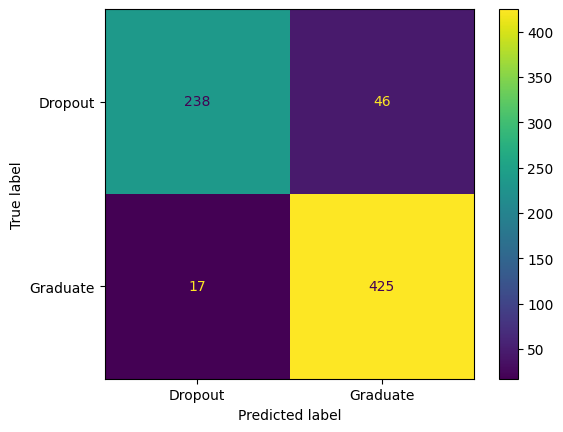

In [92]:
logistic_clf.evaluate(X_test, y_test)

In [93]:
#features_to_include = ['Fathers qualification', 'Mothers qualification', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Tuition fees up to date', 'Curricular units 1st sem (evaluations)', 'Age_Normalized', 'Curricular units 1st sem (enrolled)', 'Scholarship holder', 'Debtor', 'Curricular units 2nd sem (enrolled)', 'Course', 'Gender']

In [94]:
# logistic_clf.predict([["Biofuel Production Technologies", "Yes", "Yes", "Secondary Education - 12th Year of Schooling or Eq.","Secondary Education - 12th Year of Schooling or Eq.", "Male", 20, 20, 10, 9, 1, 4, 5, 0.3]])

In [95]:
ridge_clf = Model(model_name = "Ridge classifier", 
                    estimator = RidgeClassifier(),
                    preprocessor = preprocess_pipe,
                    scoring = "f1_micro",
                    random_state = 32)

In [96]:
ridge_clf.train(X_train, y_train)

Cross validated training results for Ridge classifier model
---------------------------------------------------------
Train score: 0.9113292355202743 +/- 0.003972674660959098
Validation score: 0.9008297228322156 +/- 0.01402943489520901


In [97]:
param_grid = {"model__alpha": [0.01, 0.1, 1, 10, 100]}
ridge_clf.tune(param_grid, X_train, y_train)

Best parameters:  {'model__alpha': 10}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.910 +/- 0.003646
Score of the model on the validation set:
0.901 +/- 0.014854


F1 score on test set:  0.90633608815427

              precision    recall  f1-score   support

     Dropout       0.97      0.79      0.87       284
    Graduate       0.88      0.98      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.88      0.90       726
weighted avg       0.91      0.91      0.90       726



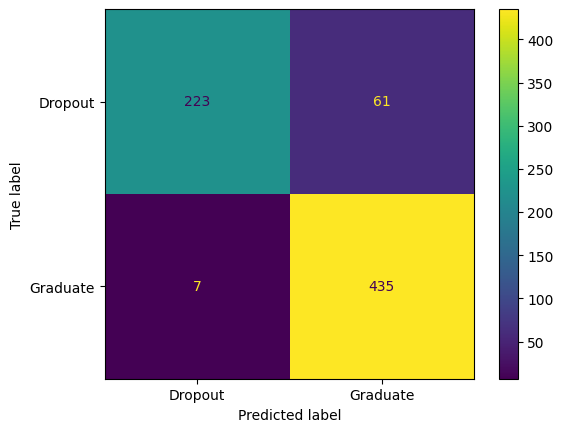

In [98]:
ridge_clf.evaluate(X_test, y_test)

In [99]:
## SVM

In [100]:
svm_clf = Model(model_name = "SVM classifier", 
                    estimator = LinearSVC(),
                    preprocessor = preprocess_pipe,
                    scoring = "f1_micro",
                    random_state = 32)

In [101]:
svm_clf.train(X_train, y_train)

Cross validated training results for SVM classifier model
---------------------------------------------------------
Train score: 0.9195078326960138 +/- 0.005103793157200415
Validation score: 0.9059944210338893 +/- 0.013429824896019184


In [102]:
param_grid = {
    "model__penalty": ["l1", "l2"],
    "model__loss": ["squared_hinge"],
    "model__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "model__dual": [False]  # Set dual to False for l1 penalty
}

svm_clf.tune(param_grid, X_train, y_train)

Best parameters:  {'model__C': 0.1, 'model__dual': False, 'model__loss': 'squared_hinge', 'model__penalty': 'l1'}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.913 +/- 0.004619
Score of the model on the validation set:
0.908 +/- 0.014034


F1 score on test set:  0.9173553719008265

              precision    recall  f1-score   support

     Dropout       0.96      0.82      0.89       284
    Graduate       0.90      0.98      0.94       442

    accuracy                           0.92       726
   macro avg       0.93      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



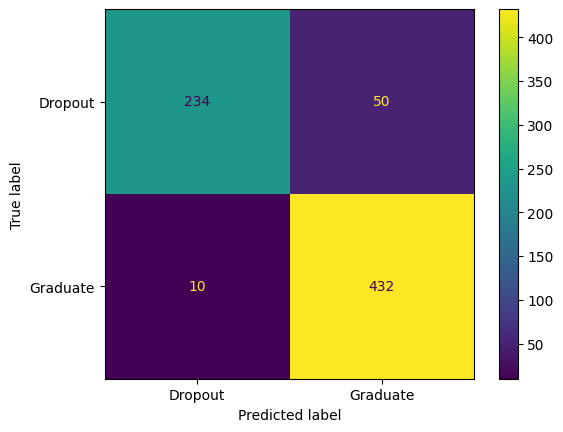

In [103]:
svm_clf.evaluate(X_test, y_test)

In [104]:
## Decision Tree

In [105]:
tree_clf = Model(model_name = "Decision tree classifier", 
                    estimator = DecisionTreeClassifier(min_samples_leaf=10, max_depth=50, max_features=16, max_leaf_nodes= 10),
                    preprocessor = preprocess_pipe,
                    scoring = "f1_micro",
                    random_state = 32)

In [106]:
tree_clf.train(X_train, y_train)

Cross validated training results for Decision tree classifier model
---------------------------------------------------------
Train score: 0.8608797899920202 +/- 0.013694368289593244
Validation score: 0.8429841533622173 +/- 0.029156751354140115


In [107]:
param_grid = {"model__max_depth": [2, 3, 4, 5, 10],
                "model__min_samples_split":[2, 4, 6, 8, 10],
                "model__min_samples_leaf": [1, 2, 3, 6, 7, 8]}

tree_clf.tune(param_grid, X_train, y_train)

Best parameters:  {'model__max_depth': 5, 'model__min_samples_leaf': 6, 'model__min_samples_split': 6}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.873 +/- 0.010962
Score of the model on the validation set:
0.875 +/- 0.017107


F1 score on test set:  0.8760330578512396

              precision    recall  f1-score   support

     Dropout       0.83      0.85      0.84       284
    Graduate       0.90      0.89      0.90       442

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



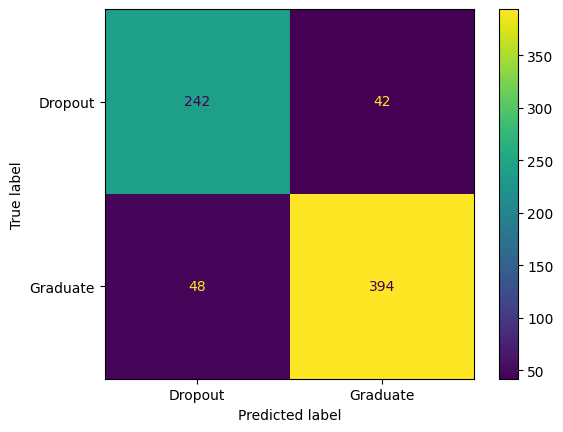

In [108]:
tree_clf.evaluate(X_test, y_test)

In [109]:
## Random Forest

In [110]:
rf_clf = Model(model_name = "Random forest classifier", 
                    estimator = RandomForestClassifier(min_samples_split=8,min_samples_leaf=6, max_depth=15, n_estimators=150),
                    preprocessor = preprocess_pipe,
                    scoring = "f1_micro",
                    random_state = 32)
rf_clf.train(X_train,y_train)

Cross validated training results for Random forest classifier model
---------------------------------------------------------
Train score: 0.9203684549402332 +/- 0.002019166525916072
Validation score: 0.8994527865155202 +/- 0.02209621962159175


In [111]:
#param_grid = {"model__n_estimators": [125, 150, 175],
 #               "model__max_depth": [3, 4, 5, 10, 15],
  #              "model__min_samples_split":[2, 4, 6, 8, 10],
   #             "model__min_samples_leaf": [1, 2, 3, 6, 7, 8]}

#rf_clf.tune(param_grid, X_train, y_train)

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a base RandomForestClassifier
rf_base = RandomForestClassifier(random_state=42)

# Parameter grid for RandomizedSearchCV
param_dist = {
    "n_estimators": [125, 150, 175],
    "max_depth": [3, 4, 5, 10, 15],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 6, 7, 8]
}

n_iter = 10

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=n_iter,
    scoring="accuracy",
    cv=5,  
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

Best parameters: {'n_estimators': 150, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 15}


F1 score on test set:  0.9049586776859504

              precision    recall  f1-score   support

     Dropout       0.93      0.82      0.87       284
    Graduate       0.89      0.96      0.92       442

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.91      0.90      0.90       726



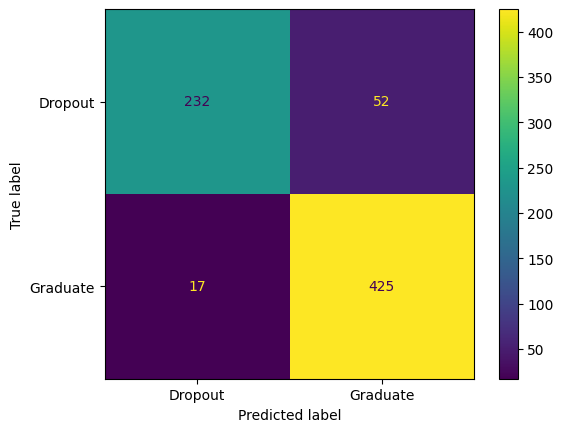

In [113]:
rf_clf.evaluate(X_test, y_test)

In [114]:
dtree = tree_clf.fitted_model

In [115]:
from sklearn.tree import plot_tree

<Figure size 4000x4000 with 0 Axes>

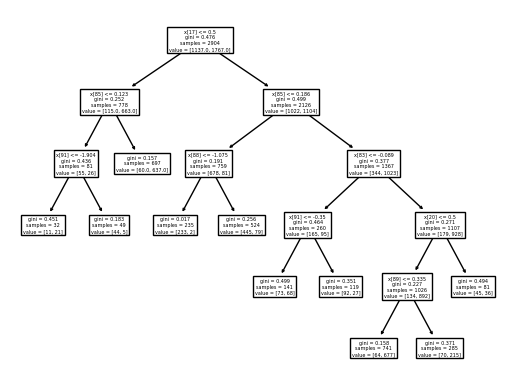

<Figure size 4000x4000 with 0 Axes>

In [116]:
plot_tree(dtree[-1]);
plt.figure(figsize=(40, 40))

In [117]:
df.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [118]:
import pandas as pd
import numpy as np

# Assuming X_train and y_train are pandas DataFrames or can be converted to one
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

# Check for NaN values in X_train
print("NaN values in X_train:\n", X_train_df.isnull().sum())

# Check for NaN values in y_train
print("NaN values in y_train:\n", y_train_df.isnull().sum())

NaN values in X_train:
 fathers_qualification                       0
mothers_qualification                       0
curricular_units_1st_sem_approved           0
curricular_units_2nd_sem_approved           0
get_curricular_units_2nd_sem_grade          0
curricular_units_1st_sem_grade              0
curricular_units_2nd_sem_evaluations        0
tuition_fees_up_to_date                     0
get_curricular_units_1st_sem_evaluations    0
Age_Normalized                              0
get_curricular_units_1st_sem_enrolled       0
scholarship_holder                          0
Debtor                                      0
get_curricular_units_2nd_sem_enrolled       0
Course                                      0
Gender                                      0
dtype: int64
NaN values in y_train:
 Target    0
dtype: int64


In [119]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf=Model(model_name="AdaBoostClassifier", estimator= AdaBoostClassifier(), random_state=42 )
ada_boost_clf.train(X_train,y_train)

Cross validated training results for AdaBoostClassifier model
---------------------------------------------------------
Train score: 0.9096074723838468 +/- 0.004181732685670583
Validation score: 0.8994492254733218 +/- 0.015416307151210154


In [120]:
ada_boost_clf=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,random_state=42), n_estimators=50, learning_rate=0.3,random_state=42)

In [121]:
ada_boost_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=42),
                   learning_rate=0.3, random_state=42)

In [122]:
xscore=ada_boost_clf.score(X_test, y_test)
xscore

0.8939393939393939

In [2]:
import pandas as pd

# Data
data = {
    'model': ['Logistic Regression', 'Ridge Classifier', 'SVM', 'Decision Tree', 'Random Forest', 'ADA Boost'],
    'accuracy': [91.76, 91.11, 91.95, 86.08, 92.03, 90.96]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Displaying DataFrame
df

,model,accuracy
0,Logistic Regression,91.76
1,Ridge Classifier,91.11
2,SVM,91.95
3,Decision Tree,86.08
4,Random Forest,92.03
5,ADA Boost,90.96


In [123]:
import pickle

# Assuming logistic_clf is your trained model object
with open('rf_clf.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

print("Model saved successfully.")

Model saved successfully.


In [124]:
import dill as pickle

# loading the trained model
with open('rf_clf.pkl', 'rb') as file:
    classifier = pickle.load(file)
